In [1]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from utils import get_data, get_X_show, get_metrics, get_post


In [2]:
seed = 24
np.random.seed(seed)

# get data
d_x = 10  # number of fourier features
n_train = 5
n_test = 10000
X_train, Y_train, X_train_orig = get_data(d_x=d_x, n_data=n_train)
X_test, Y_test, X_test_orig = get_data(d_x=d_x, n_data=n_test)
X_show, X_show_orig = get_X_show(d_x=d_x)
Y_true = torch.sum(X_show, 1)


# fit

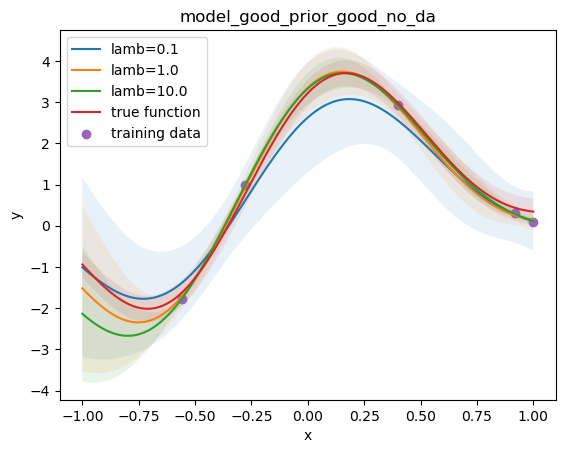

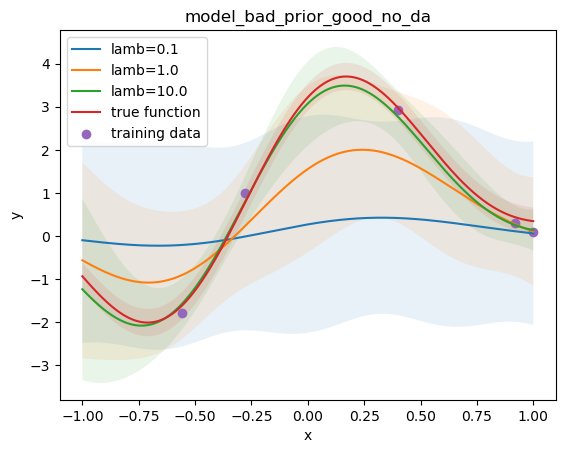

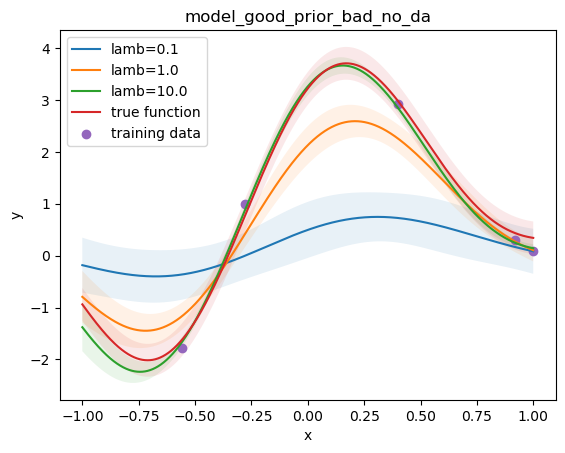

In [3]:
settings = [
    "model_good_prior_good_no_da",
    "model_bad_prior_good_no_da",
    "model_good_prior_bad_no_da",
]

for setting in settings:

    if setting == "model_good_prior_good_no_da":
        var_likelihood = 0.025
        var_prior = 1.0
    if setting == "model_bad_prior_good_no_da":
        var_likelihood = 1.0
        var_prior = 1.0
    if setting == "model_good_prior_bad_no_da":
        var_likelihood = 0.025
        var_prior = 0.05

    dir_prefix = f"./results/blr_exact/{setting}/"
    if not os.path.exists(dir_prefix):
        os.makedirs(dir_prefix)

    # model fit
    plt.figure()
    for lamb in [0.1, 1.0, 10.0]:
        m_N, S_N, _ = get_post(X_train, Y_train, var_prior, var_likelihood, lamb)
        post_pred_mean = X_show @ m_N
        post_pred_var = torch.diag(X_show @ S_N @ X_show.T)
        plt.plot(X_show_orig, post_pred_mean, label=f"lamb={lamb}")
        plt.fill_between(
            X_show_orig,
            post_pred_mean + 2 * torch.sqrt(post_pred_var),
            post_pred_mean - 2 * torch.sqrt(post_pred_var),
            alpha=0.1,
        )
    plt.plot(X_show_orig, Y_true, label="true function")
    plt.fill_between(X_show_orig, Y_true + 2 * 0.158, Y_true - 2 * 0.158, alpha=0.1)
    plt.scatter(X_train_orig, Y_train, label="training data", marker="o")
    plt.legend()
    plt.title(f"{setting}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.savefig(f"{dir_prefix}/fit_{setting}.png", dpi=300)
    plt.show()


# metrics
## large range

0.01
0.1
1.0
10.0
100.0
1000.0


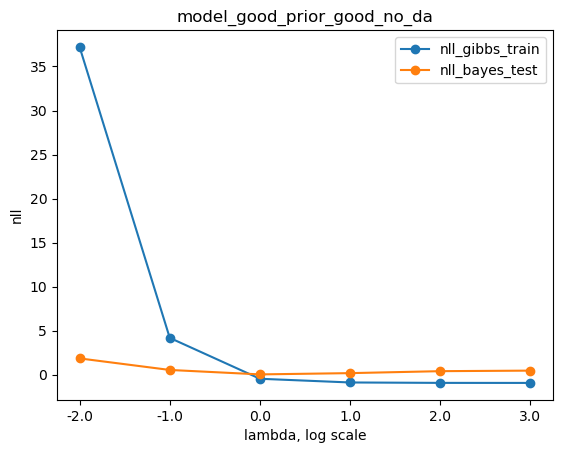

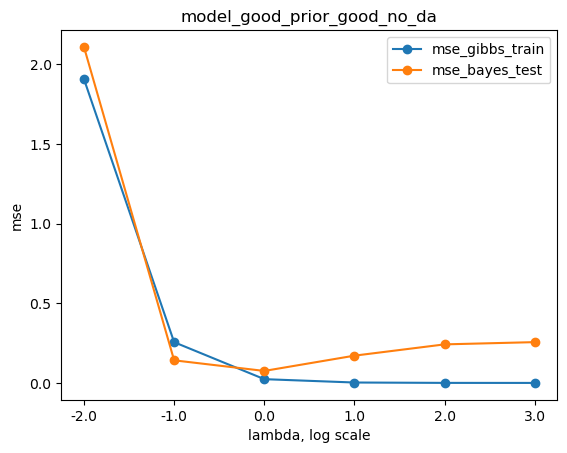

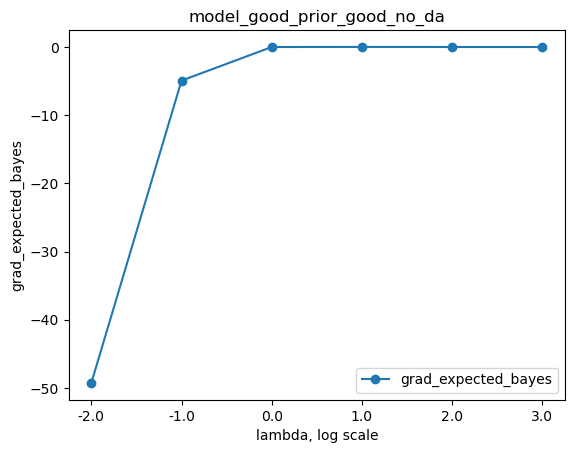

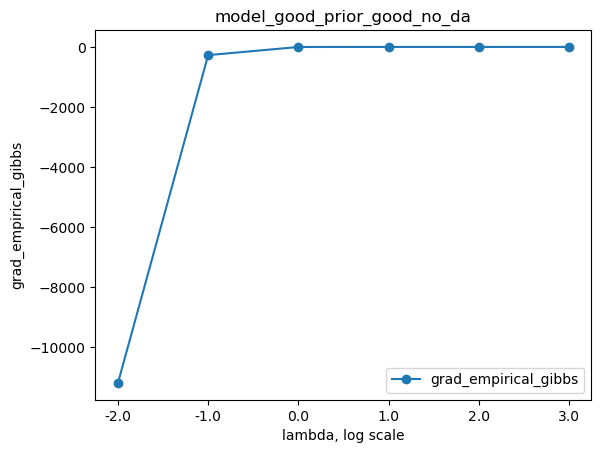

0.01
0.1
1.0
10.0
100.0
1000.0


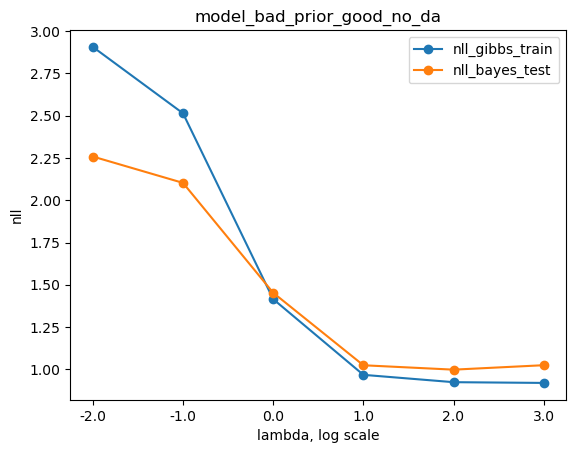

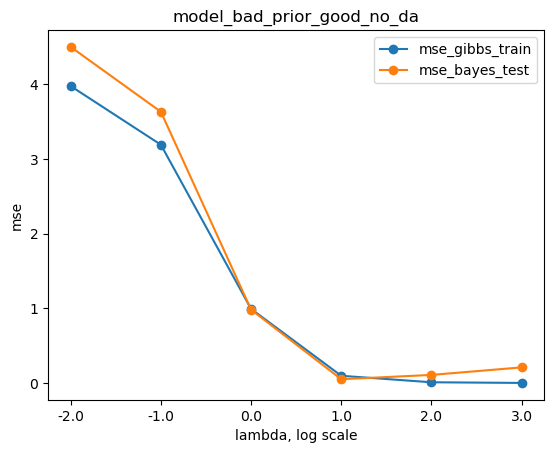

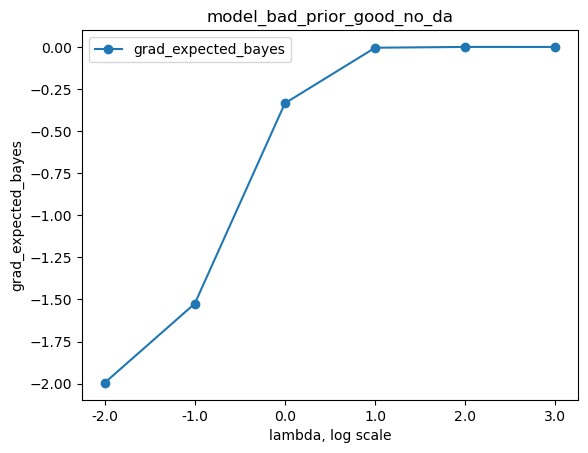

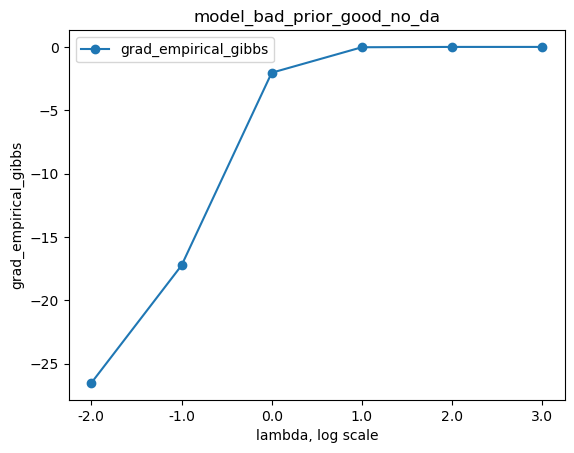

0.01
0.1
1.0
10.0
100.0
1000.0


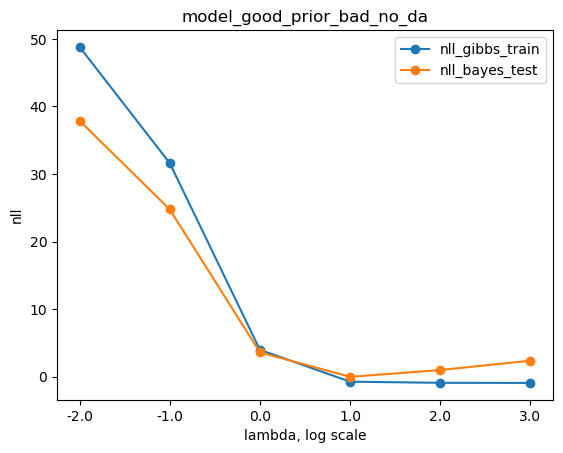

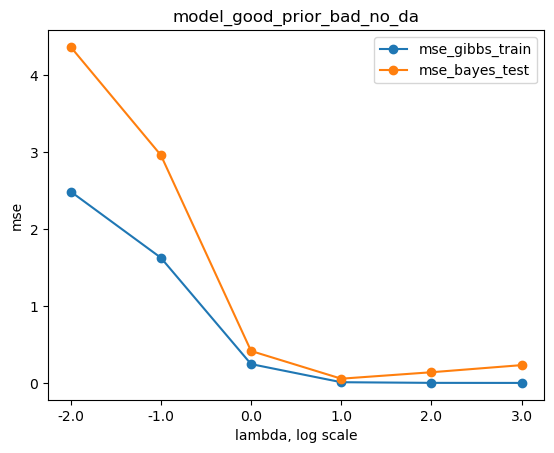

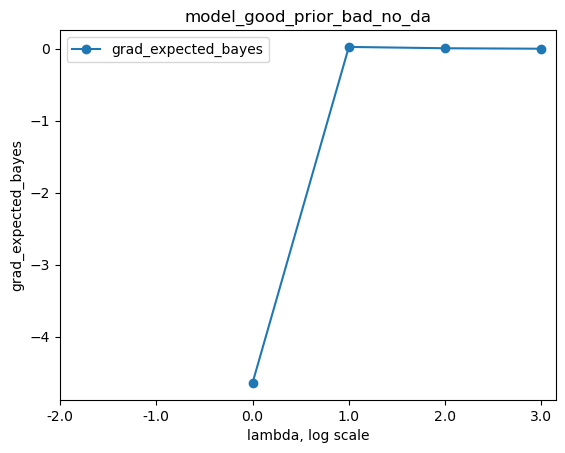

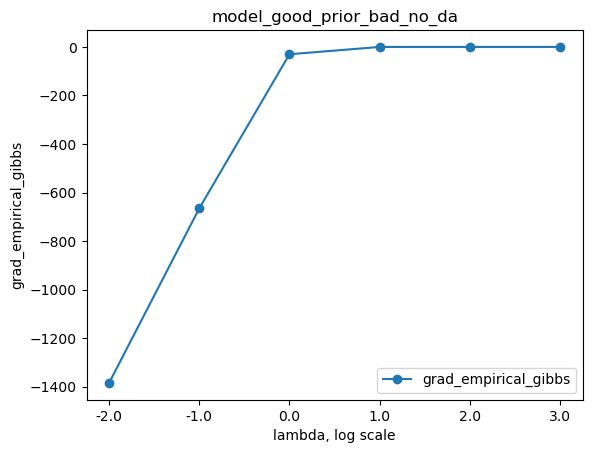

In [7]:
settings = [
    "model_good_prior_good_no_da",
    "model_bad_prior_good_no_da",
    "model_good_prior_bad_no_da",
]

for setting in settings:

    if setting == "model_good_prior_good_no_da":
        var_likelihood = 0.025
        var_prior = 1.0
    if setting == "model_bad_prior_good_no_da":
        var_likelihood = 1.0
        var_prior = 1.0
    if setting == "model_good_prior_bad_no_da":
        var_likelihood = 0.025
        var_prior = 0.05

    dir_prefix = f"./results/blr_exact/{setting}/"
    if not os.path.exists(dir_prefix):
        os.makedirs(dir_prefix)

    lambs = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

    result = get_metrics(
        X_train,
        Y_train,
        X_test,
        Y_test,
        var_prior,
        var_likelihood,
        lambs,
    )

    # nll
    plt.figure()
    plt.plot(
        np.arange(0, len(lambs), 1),
        result["nll_gibbs_train"],
        marker="o",
        label="nll_gibbs_train",
    )
    plt.plot(
        np.arange(0, len(lambs), 1),
        result["nll_bayes_test"],
        marker="o",
        label="nll_bayes_test",
    )
    plt.legend()
    # plt.ylim(-1,3)
    plt.xticks(np.arange(0, len(lambs), 1), np.log10(lambs))
    plt.xlabel("lambda, log scale")
    plt.ylabel("nll")
    plt.title(f"{setting}")
    plt.savefig(f"{dir_prefix}/nll_bayes_gibbs_large_{setting}.png", dpi=300)
    plt.show()

    # mse
    plt.figure()
    plt.plot(
        np.arange(0, len(lambs), 1),
        result["mse_gibbs_train"],
        marker="o",
        label="mse_gibbs_train",
    )
    plt.plot(
        np.arange(0, len(lambs), 1),
        result["mse_bayes_test"],
        marker="o",
        label="mse_bayes_test",
    )
    plt.legend()
    plt.xticks(np.arange(0, len(lambs), 1), np.log10(lambs))
    plt.xlabel("lambda, log scale")
    plt.ylabel("mse")
    plt.title(f"{setting}")
    plt.savefig(f"{dir_prefix}/mse_bayes_gibbs_large_{setting}.png", dpi=300)
    plt.show()

    # grad_expected_bayes
    plt.figure()
    plt.plot(
        np.arange(0, len(lambs), 1),
        result["grad_expected_bayes"],
        marker="o",
        label="grad_expected_bayes",
    )
    plt.legend()
    plt.xticks(np.arange(0, len(lambs), 1), np.log10(lambs))
    plt.xlabel("lambda, log scale")
    plt.ylabel("grad_expected_bayes")
    plt.title(f"{setting}")
    plt.savefig(f"{dir_prefix}/grad_bayes_large_{setting}.png", dpi=300)
    plt.show()

    # grad_empirical_gibbs
    plt.figure()
    plt.plot(
        np.arange(0, len(lambs), 1),
        result["grad_empirical_gibbs"],
        marker="o",
        label="grad_empirical_gibbs",
    )
    plt.legend()
    plt.xticks(np.arange(0, len(lambs), 1), np.log10(lambs))
    plt.xlabel("lambda, log scale")
    plt.ylabel("grad_empirical_gibbs")
    plt.title(f"{setting}")
    plt.savefig(f"{dir_prefix}/grad_gibbs_large_{setting}.png", dpi=300)
    plt.show()


## small range

0.8
0.9
1.0
1.1
1.2


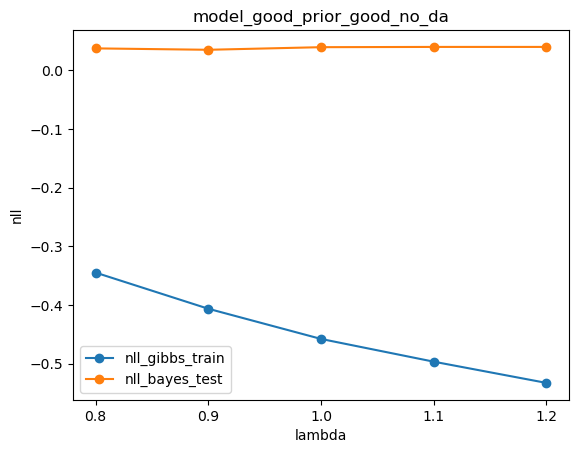

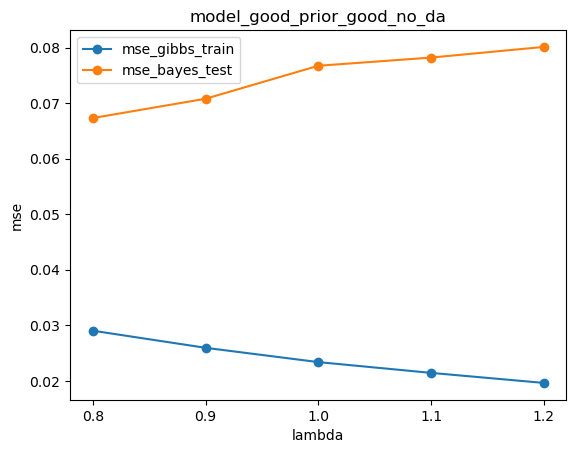

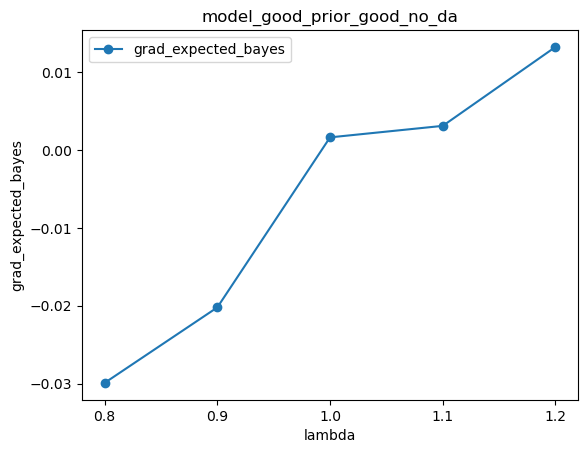

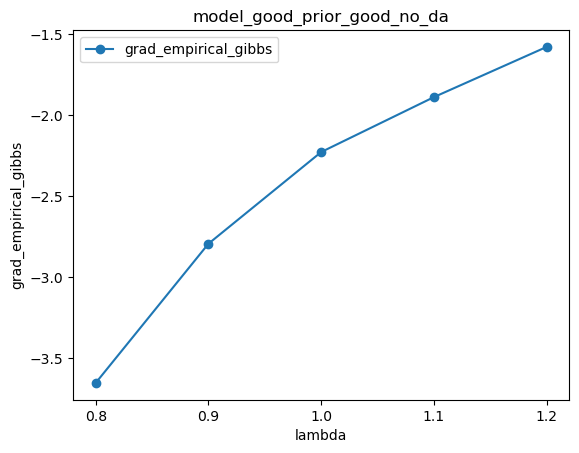

0.8
0.9
1.0
1.1
1.2


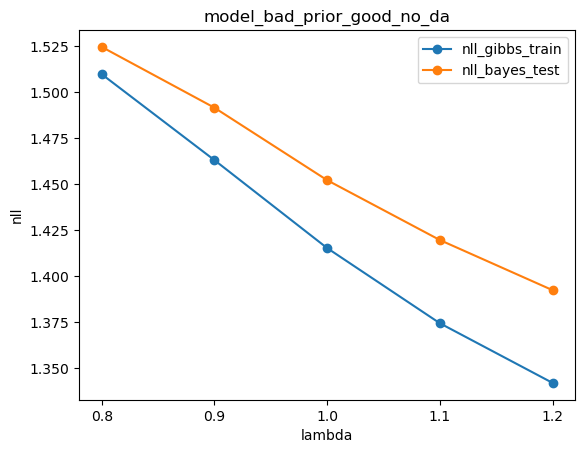

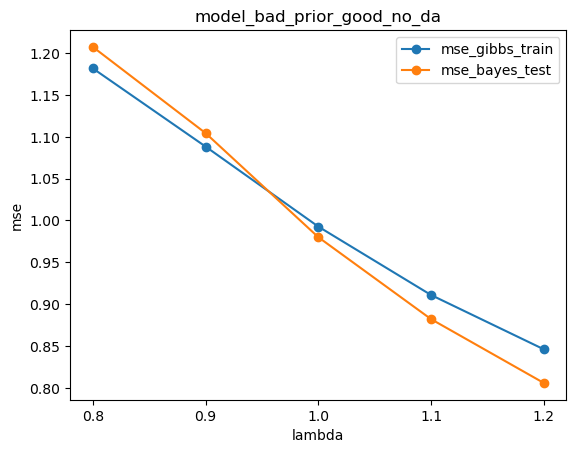

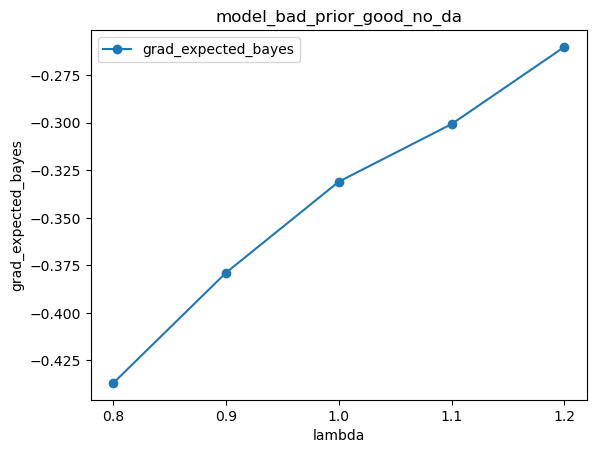

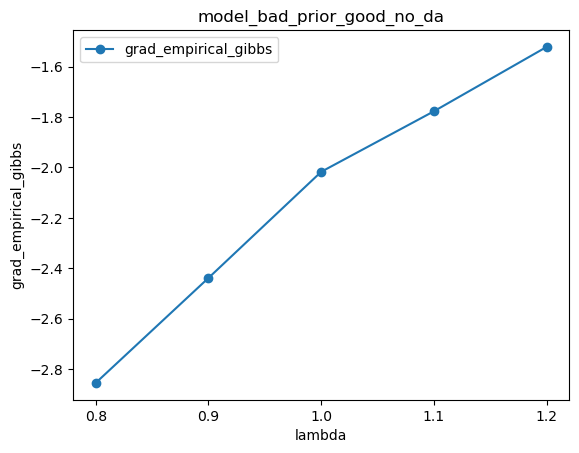

0.8
0.9
1.0
1.1
1.2


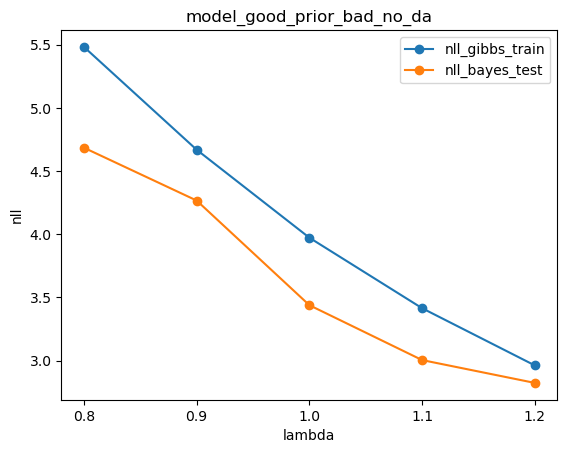

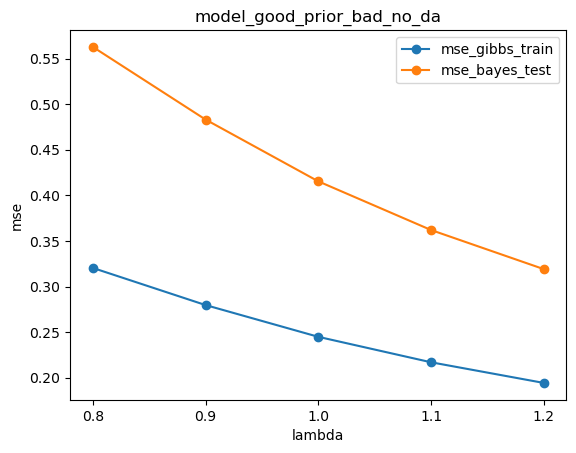

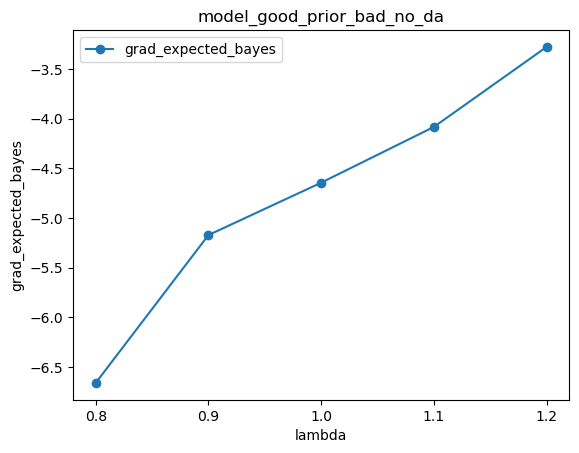

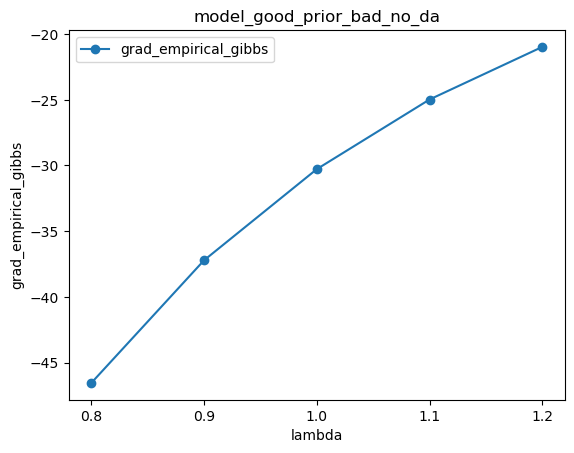

In [6]:
settings = [
    "model_good_prior_good_no_da",
    "model_bad_prior_good_no_da",
    "model_good_prior_bad_no_da",
]

for setting in settings:

    if setting == "model_good_prior_good_no_da":
        var_likelihood = 0.025
        var_prior = 1.0
    if setting == "model_bad_prior_good_no_da":
        var_likelihood = 1.0
        var_prior = 1.0
    if setting == "model_good_prior_bad_no_da":
        var_likelihood = 0.025
        var_prior = 0.05

    dir_prefix = f"./results/blr_exact/{setting}/"
    if not os.path.exists(dir_prefix):
        os.makedirs(dir_prefix)

    lambs = np.linspace(0.8, 1.2, 5)

    result = get_metrics(
        X_train,
        Y_train,
        X_test,
        Y_test,
        var_prior,
        var_likelihood,
        lambs,
    )

    # nll
    plt.figure()
    plt.plot(
        np.arange(0, len(lambs), 1),
        result["nll_gibbs_train"],
        marker="o",
        label="nll_gibbs_train",
    )
    plt.plot(
        np.arange(0, len(lambs), 1),
        result["nll_bayes_test"],
        marker="o",
        label="nll_bayes_test",
    )
    plt.legend()
    # plt.ylim(-1,3)
    plt.xticks(np.arange(0, len(lambs), 1), lambs)
    plt.xlabel("lambda")
    plt.ylabel("nll")
    plt.title(f"{setting}")
    plt.savefig(f"{dir_prefix}/nll_bayes_gibbs_small_{setting}.png", dpi=300)
    plt.show()

    # mse
    plt.figure()
    plt.plot(
        np.arange(0, len(lambs), 1),
        result["mse_gibbs_train"],
        marker="o",
        label="mse_gibbs_train",
    )
    plt.plot(
        np.arange(0, len(lambs), 1),
        result["mse_bayes_test"],
        marker="o",
        label="mse_bayes_test",
    )
    plt.legend()
    plt.xticks(np.arange(0, len(lambs), 1), lambs)
    plt.xlabel("lambda")
    plt.ylabel("mse")
    plt.title(f"{setting}")
    plt.savefig(f"{dir_prefix}/mse_bayes_gibbs_small_{setting}.png", dpi=300)
    plt.show()

    # grad_expected_bayes
    plt.figure()
    plt.plot(
        np.arange(0, len(lambs), 1),
        result["grad_expected_bayes"],
        marker="o",
        label="grad_expected_bayes",
    )
    plt.legend()
    plt.xticks(np.arange(0, len(lambs), 1), lambs)
    plt.xlabel("lambda")
    plt.ylabel("grad_expected_bayes")
    plt.title(f"{setting}")
    plt.savefig(f"{dir_prefix}/grad_bayes_small_{setting}.png", dpi=300)
    plt.show()

    # grad_empirical_gibbs
    plt.figure()
    plt.plot(
        np.arange(0, len(lambs), 1),
        result["grad_empirical_gibbs"],
        marker="o",
        label="grad_empirical_gibbs",
    )
    plt.legend()
    plt.xticks(np.arange(0, len(lambs), 1), lambs)
    plt.xlabel("lambda")
    plt.ylabel("grad_empirical_gibbs")
    plt.title(f"{setting}")
    plt.savefig(f"{dir_prefix}/grad_gibbs_small_{setting}.png", dpi=300)
    plt.show()
